# Packages

In [10]:
import netCDF4 as nc4

import mat73

import numpy as np  #The basic python scientific package

import pandas as pd #Datascience package for handling data
from pandas import read_csv

from datetime import datetime
from time import time

import math

import matplotlib.pyplot as plt 


# Declaration Path

In [117]:
dir_out = '/Users/floriankokoszka/Desktop/GNAM/connectivity/'

# Geography

In [69]:
url_ITcoast = 'https://raw.githubusercontent.com/fszk/data/main/bathy/coast/ITcoast.csv'

import pandas as pd

ITcoast = pd.read_csv(url_ITcoast)


ITcoast

TCOAST_lon = np.array(ITcoast['lonIT'])
TCOAST_lat = np.array(ITcoast['latIT'])


# Definitions of zones

In [44]:
import haversine as hs

In [45]:
dlon = 0.0289*2.235
dlat = 0.0289*2.235

dlon = 0.0645915
dlat = 0.0645915 

x0 = 14.25
y0 = 40.80

loc1 = (x0,y0)
loc2 = (x0+dlon,y0)
dx = hs.haversine(loc1,loc2)
print(dx,'km')

loc1 = (x0,y0)
loc2 = (x0,y0+dlat)
dy = hs.haversine(loc1,loc2)
print(dy,'km')

ds = dx*dy
print(ds,'km²')

dom_x = [x0, x0+dlon, x0+dlon,x0]
dom_y = [y0, y0, y0+dlat, y0+dlat]

7.182257024904201 km
6.961265487659881 km
49.997597950968355 km²


In [46]:
dlon = 0.0645915
dlat = 0.0645915 

pouieme = 1e-3

ZN_NM = []
ZN_ID = []
DOM_X = []
DOM_Y = []

x0 = 13.5946-pouieme ; y0 = 41.1823+0.02 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Formia') ; ZN_ID.append(1)
x0 = 13.6592 ; y0 = 41.1823+0.01 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Minturno'); ZN_ID.append(1)
x0 = 13.7238+pouieme ; y0 = 41.15+0.01 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Cellole') ; ZN_ID.append(1)
x0 = 13.7884+2*pouieme ; y0 = 41.1069 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Dominzia') ;ZN_ID.append(1)
x0 = 13.853+3*pouieme ; y0 = 41.0553 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Mondragrone') ; ZN_ID.append(1)
x0 = 13.853 ; y0 = 40.9907-pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Volturno') ; ZN_ID.append(100)
x0 = 13.9175+2*pouieme ; y0 = 40.9584 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Coppola') ; ZN_ID.append(1)
x0 = 13.9498 ; y0 = 40.8938-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Patria') ; ZN_ID.append(1)
x0 = 13.9821+0.015 ; y0 = 40.8292-2*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Torregaveta') ; ZN_ID.append(1)

x0 = 13.8852-2*pouieme ; y0 = 40.7646-3*pouieme - 0.02 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('IschiAMP') ; ZN_ID.append(1)
x0 = 13.8206-3*pouieme ; y0 = 40.7646-3*pouieme - 0.02 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('IschiaNW') ; ZN_ID.append(1)


x0 = 13.9498 ; y0 = 40.7646-3*pouieme-0.01 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('CanaleN') ; ZN_ID.append(12)
x0 = 13.97-pouieme ; y0 = 40.667+0.015 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('CanaleW') ; ZN_ID.append(12)
x0 = 14.0346 ; y0 = 40.7187+0.03 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('CanaleE') ; ZN_ID.append(12)

x0 = 14.0992+pouieme ; y0 = 40.7424+0.035 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Bagnoli'); ZN_ID.append(2)
x0 = 14.165+2*pouieme ; y0 = 40.725+0.03 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Gaiola') ; ZN_ID.append(2)
x0 = 14.2356 ; y0 = 40.7569 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Napoli-MC') ; ZN_ID.append(2)
x0 = 14.3213+0.01 ; y0 = 40.7142+0.03 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('TorrGr') ; ZN_ID.append(2)


x0 = 14.4013+0.02 ; y0 = 40.685+0.005 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Sarno') ; ZN_ID.append(200)
x0 = 14.4013-dlon-10*pouieme+0.03 ; y0 = 40.6427-0.02  ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('VicoSorr') ; ZN_ID.append(2)
x0 = x0-dlon-5*pouieme+0.0025 ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('MassaL') ; ZN_ID.append(2)


#x0 = 14.3213 ; y0 = 40.6427 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Vico') ; ZN_ID.append(2)
x0 = 14.1814+0.01 ; y0 = 40.5612- 0.04 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Capri') ; ZN_ID.append(2)
x0 = 14.11 ; y0 = 40.6+0.015 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('CanyonDohrn') ; ZN_ID.append(2)

x0 = 14.256+0.005 ; y0 = 40.5212 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaP') ; ZN_ID.append(23)

x0 = 14.3346-3*pouieme+0.005 ; y0 = 40.5173+0.005 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('PuntaCamp') ; ZN_ID.append(3)
x0 = 14.3992-2*pouieme+0.005 ; y0 = 40.5496+0.005 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Fontanelle') ; ZN_ID.append(3)
x0 = 14.4638-1*pouieme+0.005 ; y0 = 40.5496+0.04 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Positano') ; ZN_ID.append(3)
x0 = 14.5284+0.005 ; y0 = 40.5496+0.03 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Praiano') ; ZN_ID.append(3)
x0 = 14.593+pouieme+0.005 ; y0 = 40.5819+0.02 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Maiori') ; ZN_ID.append(3)
x0 = 14.6575+2*pouieme+0.005 ; y0 = 40.5819+0.02 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Cetara') ; ZN_ID.append(3)
x0 = 14.7221+3*pouieme+0.005 ; y0 = 40.6142+0.01 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('VietriSalerno') ; ZN_ID.append(3)
x0 = 14.7867+4*pouieme+0.01 ; y0 = 40.5819 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Arechi') ; ZN_ID.append(3)
x0 = 14.8298+0.02 ; y0 = 40.5173-pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Aversana') ; ZN_ID.append(3)
x0 = 14.8729+0.02 ; y0 = 40.4527-2*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Sele') ; ZN_ID.append(300)
x0 = 14.9051+0.02 ; y0 = 40.3881-3*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Paestum') ; ZN_ID.append(3)
x0 = 14.9051+0.015 ; y0 = 40.3235-4*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('Agropoli') ; ZN_ID.append(3)
x0 = 14.8729+0.005 ; y0 = 40.2589-5*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('S.MariaCast') ; ZN_ID.append(3)


x0 = 13.525 ; y0 = 41.13 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi1') ; ZN_ID.append(10)
x0 = x0+dlon/1.5 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi2') ; ZN_ID.append(10)
x0 = x0+dlon/2 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi3') ; ZN_ID.append(10)
x0 = x0+dlon/2 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi4') ; ZN_ID.append(10)
x0 = x0+dlon/2 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi5') ; ZN_ID.append(10)
x0 = x0+dlon/2 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi6') ; ZN_ID.append(10)
x0 = x0+dlon/2 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi7') ; ZN_ID.append(10)
x0 = x0+dlon/1.6 ; y0 = y0-dlat-1*pouieme ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('GaeTi8') ; ZN_ID.append(10)

#x0 = 13.86-3*pouieme ; y0 = 40.62 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG1') ; ZN_ID.append(20)

x0 = x0+dlon+1*pouieme ; y0 = 40.62 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG1') ; ZN_ID.append(20)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG2') ; ZN_ID.append(20)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG3') ; ZN_ID.append(20)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG4') ; ZN_ID.append(20)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG5') ; ZN_ID.append(20)


#x0 = 13.9246-2*pouieme ; y0 = 40.5877 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG2') ; ZN_ID.append(20)
#x0 = 13.9892-1*pouieme ; y0 = 40.5554 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG3') ; ZN_ID.append(20)
#x0 = 14.0538 ; y0 = 40.5231 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG4') ; ZN_ID.append(20)
#x0 = 14.1184+1*pouieme ; y0 = 40.4908 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('BoccaG5') ; ZN_ID.append(20)

#x0 = 14.1184+dlon+2*pouieme ; y0 = 40.4908-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr1') ; ZN_ID.append(30)

x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/1.5 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr1') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr2') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr3') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr4') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr5') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr6') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/2 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr7') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/3 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr8') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/3 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr9') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/3 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalerTirr10') ; ZN_ID.append(30)
x0 = x0+dlon+1*pouieme ; y0 = y0-dlat/4 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat]); ZN_NM.append('SalernTirr11') ; ZN_ID.append(30)


lon1 = []
lon2 = []
lon3 = []
lon4 = []
lat1 = []
lat2 = []
lat3 = []
lat4 = []
lonC = []
latC = [] 
zones_names = np.arange(0,len(DOM_X))
for i in range(0,len(DOM_X)):
    lon1.append(DOM_X[i][0])
    lon2.append(DOM_X[i][1])
    lon3.append(DOM_X[i][2])
    lon4.append(DOM_X[i][3])
    lat1.append(DOM_Y[i][0])
    lat2.append(DOM_Y[i][1])
    lat3.append(DOM_Y[i][2])
    lat4.append(DOM_Y[i][3])
    lonC.append(np.nanmean(DOM_X[i]))
    latC.append(np.nanmean(DOM_Y[i]))
lon1 = np.array(lon1)
lon2 = np.array(lon2)
lon3 = np.array(lon3)
lon4 = np.array(lon4)
lat1 = np.array(lat1)
lat2 = np.array(lat2)
lat3 = np.array(lat3)
lat4 = np.array(lat4)
lonC = np.array(lonC)
latC = np.array(latC)

pouieme = 1e-6
lon11 = lon1 + pouieme
lon22 = lon2 - pouieme
lon33 = lon3 - pouieme
lon44 = lon4 + pouieme

lat11 = lat1 + pouieme
lat22 = lat2 + pouieme
lat33 = lat3 - pouieme
lat44 = lat4 - pouieme

lonCC = lonC
latCC = latC


print('ZONES DEFINED')

ZONES DEFINED


In [47]:
stn = 'DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])'
for i in range(0,len(DOM_X)):
    toto = 'x0 = ' + str(np.round(np.nanmean(DOM_X[i])-dlon/2,4)) +' ; y0 = ' +str(np.round(np.nanmean(DOM_Y[i])-dlat/2,4)) + ' ; ' + stn
    #XY.append
    print(toto)

x0 = 13.5936 ; y0 = 41.2023 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.6592 ; y0 = 41.1923 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.7248 ; y0 = 41.16 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.7904 ; y0 = 41.1069 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.856 ; y0 = 41.0553 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.853 ; y0 = 40.9897 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.9195 ; y0 = 40.9584 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.9498 ; y0 = 40.8928 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dlat])
x0 = 13.9971 ; y0 = 40.8272 ; DOM_X.append([x0, x0+dlon, x0+dlon,x0]); DOM_Y.append([y0, y0, y0+dlat, y0+dla

In [48]:
# verif

dlon = lon22[1]-lon11[1]
dlat = lat33[1]-lat22[1]
print(dlon)
print(dlat)
x0 = 14.25
y0 = 40.80

loc1 = (x0,y0)
loc2 = (x0+dlon,y0)
dx = hs.haversine(loc1,loc2)
print(dx,'km')

loc1 = (x0,y0)
loc2 = (x0,y0+dlat)
dy = hs.haversine(loc1,loc2)
print(dy,'km')

ds = dx*dy
print(ds,'km²')

Nx = int(np.floor(dx/0.5))
Ny = int(np.floor(dy/0.5))

print('Nx:   ',Nx,'  points')
print('Ny:   ',Ny,'  points')
print('NxNy: ',Nx*Ny,' points')

0.06458950000000208
0.06458950000000385
7.182034634743916 km
6.961049940244936 km
49.9945017650212 km²
Nx:    14   points
Ny:    13   points
NxNy:  182  points


In [51]:
S = pd.DataFrame() 
S['zone names'] = ZN_NM
S['zone id'] = ZN_ID
S['lon C'] = lonCC
S['lat C'] = latCC
S['lon 1'] = lon11
S['lat 1'] = lat11
S['lon 2'] = lon22
S['lat 2'] = lat22
S['lon 3'] = lon33
S['lat 3'] = lat33
S['lon 4'] = lon44
S['lat 4'] = lat44

S.to_csv(dir_out+'out/S.csv', index = False)
S.iloc[:,4:].to_csv(dir_out+'out/dati_zone_S.dat', header = False, index = False, sep='\t')



In [52]:
S

,zone names,zone id,lon C,lat C,lon 1,lat 1,lon 2,lat 2,lon 3,lat 3,lon 4,lat 4
0,Formia,1,13.625896,41.234596,13.593601,41.202301,13.658191,41.202301,13.658191,41.266891,13.593601,41.266891
1,Minturno,1,13.691496,41.224596,13.659201,41.192301,13.723791,41.192301,13.723791,41.256890,13.659201,41.256890
2,Cellole,1,13.757096,41.192296,13.724801,41.160001,13.789391,41.160001,13.789391,41.224590,13.724801,41.224590
3,Dominzia,1,13.822696,41.139196,13.790401,41.106901,13.854991,41.106901,13.854991,41.171491,13.790401,41.171491
4,Mondragrone,1,13.888296,41.087596,13.856001,41.055301,13.920591,41.055301,13.920591,41.119891,13.856001,41.119891
...,...,...,...,...,...,...,...,...,...,...,...,...
56,SalerTirr7,30,14.589303,40.286277,14.557008,40.253982,14.621598,40.253982,14.621598,40.318572,14.557008,40.318572
57,SalerTirr8,30,14.654895,40.264747,14.622600,40.232452,14.687189,40.232452,14.687189,40.297041,14.622600,40.297041
58,SalerTirr9,30,14.720486,40.243216,14.688191,40.210921,14.752781,40.210921,14.752781,40.275511,14.688191,40.275511
59,SalerTirr10,30,14.786078,40.221686,14.753783,40.189391,14.818372,40.189391,14.818372,40.253980,14.753783,40.253980


In [53]:
S.iloc[:,4:]

,lon 1,lat 1,lon 2,lat 2,lon 3,lat 3,lon 4,lat 4
0,13.593601,41.202301,13.658191,41.202301,13.658191,41.266891,13.593601,41.266891
1,13.659201,41.192301,13.723791,41.192301,13.723791,41.256890,13.659201,41.256890
2,13.724801,41.160001,13.789391,41.160001,13.789391,41.224590,13.724801,41.224590
3,13.790401,41.106901,13.854991,41.106901,13.854991,41.171491,13.790401,41.171491
4,13.856001,41.055301,13.920591,41.055301,13.920591,41.119891,13.856001,41.119891
...,...,...,...,...,...,...,...,...
56,14.557008,40.253982,14.621598,40.253982,14.621598,40.318572,14.557008,40.318572
57,14.622600,40.232452,14.687189,40.232452,14.687189,40.297041,14.622600,40.297041
58,14.688191,40.210921,14.752781,40.210921,14.752781,40.275511,14.688191,40.275511
59,14.753783,40.189391,14.818372,40.189391,14.818372,40.253980,14.753783,40.253980


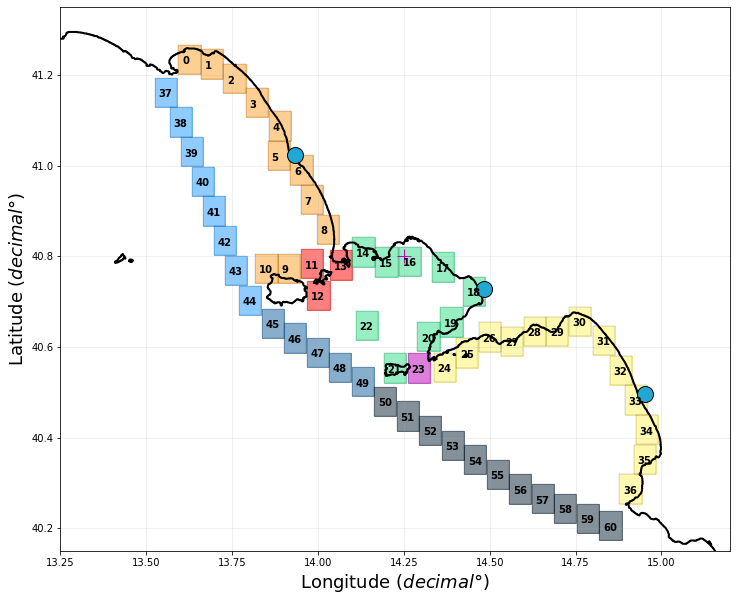

In [60]:
fig, ax = plt.subplots(1, 1,figsize=(12,10))
ax.set_xlim([13.25,15.20])
ax.set_ylim([40.15,41.35])
ax.set_xlabel('Longitude $(decimal \degree)$', fontsize=18)
ax.set_ylabel('Latitude $(decimal \degree)$', fontsize=18)

ax.plot(TCOAST_lon,TCOAST_lat,'k-',lw=2)
for i in range(0,len(DOM_X)):
    if (ZN_ID[i] == 1) | (ZN_ID[i] == 100) :
        clr_tempo = '#fca128'
    elif (ZN_ID[i] == 2) | (ZN_ID[i] == 200):
        clr_tempo = '#2fde86'
    elif (ZN_ID[i] == 3) | (ZN_ID[i] == 300):
        clr_tempo = '#fff263'
        
    elif (ZN_ID[i] == 12)  :
        clr_tempo = 'r'
    elif  ( ZN_ID[i] == 23 ) :
        clr_tempo = 'm'
        
    elif (ZN_ID[i] == 10)  :
        clr_tempo = '#1f9aff'
    elif (ZN_ID[i] == 20)  :
        clr_tempo = '#135e9c'
    elif ( ZN_ID[i] == 30 ) :
        clr_tempo = '#0a2236'
    
    ax.fill([S['lon 1'][i],S['lon 2'][i],S['lon 3'][i],S['lon 4'][i]], [S['lat 1'][i],S['lat 2'][i],S['lat 3'][i],S['lat 4'][i]],color= clr_tempo,alpha=.5)   
    ax.text(lonC[i]-dlon/3, latC[i]-dlat/6,str(i+0),color='k',fontsize=10,fontweight='bold')
    
    lon1 = S['lon 1'][i]
    lon2 = S['lon 2'][i]
    lon3 = S['lon 3'][i]
    lon4 = S['lon 4'][i]
    lat1 = S['lat 1'][i]
    lat2 = S['lat 2'][i]
    lat3 = S['lat 3'][i]
    lat4 = S['lat 4'][i]
    
    ax.plot([lon1,lon2],[lat1,lat2],'k-',lw=0.15)
    ax.plot([lon1,lon2],[lat3,lat4],'k-',lw=0.15)
    ax.plot([lon1,lon1],[lat1,lat4],'k-',lw=0.15)
    ax.plot([lon2,lon2],[lat2,lat3],'k-',lw=0.15)
    
ax.plot(13.9175+dlon/4,40.9584+dlat,'o',color='#22a7d4',markersize=16,markeredgecolor='k',lw=3)
ax.plot(14.4013+1.25*dlon,40.685+dlat/1.5,'o',color='#22a7d4',markersize=16,markeredgecolor='k',lw=3)
ax.plot(14.8729+1.25*dlon,40.4527+dlat/1.5,'o',color='#22a7d4',markersize=16,markeredgecolor='k',lw=3)

ax.plot(14.25,40.80,'+',color='m',markersize=14)

ax.grid(alpha=.25)

fig_filename = 'areas_for_connectivity_S'
fig.savefig(dir_out+'plots/' + fig_filename + '.pdf')
fig.savefig(dir_out+'plots/' + fig_filename + '.png', dpi=600)

# Declaration

In [61]:
clr_gox = '#ffdd33'
clr_tra = '#ff9b4a'
clr_fiu = '#00a85d'
clr_por = '#965000'
clr_iso = '#83f0f7'
clr_cos = '#36b3b3'
clr_zones = [clr_gox,clr_tra,clr_fiu,clr_por,clr_iso,clr_cos]

# Functions

In [70]:
def sum_matrice_conn(xxxx,mmy):
    
    # 
    xx_00 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_01 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_02 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_03 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_04 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    
    # 
    xx_00_metric2 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_01_metric2 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_02_metric2 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_03_metric2 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_04_metric2 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    
    
    
    
    #-------------------
    mask_01 = xxxx*np.nan
    mask_02 = xxxx*np.nan
    mask_03 = xxxx*np.nan
    mask_04 = xxxx*np.nan
    f01 = np.where((mmy<=2) | (mmy == 12))[0]
    f02 = np.where((mmy>=3) & (mmy <= 5 ))[0]
    f03 = np.where((mmy>=6) & (mmy <= 8 ))[0]
    f04 = np.where((mmy>=9) & (mmy <= 11 ))[0]
    #
    mask_01[:,f01,:,:] = 1
    mask_02[:,f02,:,:] = 1
    mask_03[:,f03,:,:] = 1
    mask_04[:,f04,:,:] = 1
    
    
    
    for i in range(0,xxxx.shape[2]):
        for j in range(0,xxxx.shape[2]):
            xx_00[i,j] = np.nanmean(xxxx[:,:,i,j])
            xx_01[i,j] = np.nanmean(xxxx[:,:,i,j]*mask_01[:,:,i,j])
            xx_02[i,j] = np.nanmean(xxxx[:,:,i,j]*mask_02[:,:,i,j])
            xx_03[i,j] = np.nanmean(xxxx[:,:,i,j]*mask_03[:,:,i,j])
            xx_04[i,j] = np.nanmean(xxxx[:,:,i,j]*mask_04[:,:,i,j])
            
            xx_00_metric2[i,j] = np.nanmax(xxxx[:,:,i,j])
            xx_01_metric2[i,j] = np.nanmax(xxxx[:,:,i,j]*mask_01[:,:,i,j])
            xx_02_metric2[i,j] = np.nanmax(xxxx[:,:,i,j]*mask_02[:,:,i,j])
            xx_03_metric2[i,j] = np.nanmax(xxxx[:,:,i,j]*mask_03[:,:,i,j])
            xx_04_metric2[i,j] = np.nanmax(xxxx[:,:,i,j]*mask_04[:,:,i,j])
    
    AUTOMASK = 0
    if AUTOMASK == 1:
        for i in range(0,xxxx.shape[2]):

                xx_00_metric2[i,i] = np.nan
                xx_01_metric2[i,i] = np.nan
                xx_02_metric2[i,i] = np.nan
                xx_03_metric2[i,i] = np.nan
                xx_04_metric2[i,i] = np.nan

                xx_00[i,i] = np.nan
                xx_01[i,i] = np.nan
                xx_02[i,i] = np.nan
                xx_03[i,i] = np.nan
                xx_04[i,i] = np.nan
            
    lf01 = len(f01)
    lf02 = len(f02)
    lf03 = len(f03)
    lf04 = len(f04)
    
    return xx_00, xx_01, xx_02, xx_03, xx_04, xx_00_metric2, xx_01_metric2, xx_02_metric2, xx_03_metric2, xx_04_metric2, lf01,lf02,lf03,lf04

In [71]:
def sum_matrice_conn_MACRO(xxxx,imacro):
    
    # reduced matrix, by groupes of unique values in imacro
    unique_values =np.unique(imacro)
    xxxx_macro = np.zeros((xxxx.shape[0],xxxx.shape[1],len(unique_values),len(unique_values)))
    for i in range(0,xxxx.shape[0]):
        for j in range(0,xxxx.shape[1]):
            for p in range(0,len(unique_values)) :
                fp = np.where(imacro == unique_values[p])[0]
                for a in range(0,len(unique_values)):
                    fa = np.where(imacro == unique_values[a])[0]
                    subxxxx = xxxx[i,j,fp,:][:,fa]
                    xxxx_macro[i,j,p-1,a-1] = np.nansum(subxxxx.flatten())
    return xxxx_macro
    

In [72]:
def sum_matrice_conn_PERIO(xxxx,yea,doy,yyyy,doy1,doy2):

    # 
    xx = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    xx_metric2 = np.zeros((xxxx.shape[2],xxxx.shape[3]))
    
    fy = np.where(yea == yyyy)[0]
    fd = np.where((doy >= doy1) & (doy <= doy2))[0]
    
    for i in range(0,xxxx.shape[2]):
        for j in range(0,xxxx.shape[2]):
            xx[i,j] = np.nanmean(xxxx[fy,fd,i,j])            
            xx_metric2[i,j] = np.nanmax(xxxx[fy,fd,i,j])

    
    AUTOMASK = 0
    if AUTOMASK == 1:
        for i in range(0,xxxx.shape[2]):

                xx_metric2[i,i] = np.nan
                xx[i,i] = np.nan
        
    return xx, xx_metric2

# Load data

In [118]:
## MAKETIME
#
# fn = 'matCon_4.nc' 
# fn = 'matCon_8.nc' 
# fn = 'matCon_16.nc' 
# fn = 'matCon_32.nc' 
# fn = 'matCon_64.nc' 
# fn = 'matCon_96.nc'

pth = dir_out+'data/' ;
fn = 'matCon_B_96.nc' 

f = nc4.Dataset(pth+fn, 'r')
yea = np.array(f.variables['anno'])
doy = np.array(f.variables['giorno_rilascio_da_inizio'])

DT_2013 = []
DT_2014 = []
DT_2015 = []
DT_2016 = []
DT_2017 = []

mm = doy*np.nan
for iyea in range(0,len(yea)):

    for idoy in range(0,len(doy)):
        d, y = doy[idoy], yea[iyea]

        dtt = pd.to_datetime(d, unit='D', origin=str(y))
        #print(dtt)
        dt = datetime(dtt.year,dtt.month,dtt.day)
        exec('DT_'+str(y)+'.append(dt)')
        mm[idoy] = int(dt.month)
        
DT_2013 = np.array(DT_2013)
DT_2014 = np.array(DT_2014)
DT_2015 = np.array(DT_2015)
DT_2016 = np.array(DT_2016)
DT_2017 = np.array(DT_2017)
DT = DT_2013
mmy = mm.astype(int)
mmy

print(fn)

matCon_B_96.nc


<ipython-input-118-481d0ef7b5c1>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yea = np.array(f.variables['anno'])
<ipython-input-118-481d0ef7b5c1>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  doy = np.array(f.variables['giorno_rilascio_da_inizio'])


In [124]:
##### LOAD
####
###
#

pth = dir_out+'data/' ;

fn = 'matCon_B_4.nc' 
#fn = 'matCon_B_8.nc' 
#fn = 'matCon_B_16.nc' 
#fn = 'matCon_B_32.nc' 
#fn = 'matCon_B_64.nc' 
#fn = 'matCon_B_96.nc' 

f = nc4.Dataset(pth+fn, 'r')
xxxx = np.array(f.variables['matrice_conn'])

print(fn)
print(xxxx.shape)

matCon_B_4.nc
(5, 71, 61, 61)


<ipython-input-124-c14f260da315>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xxxx = np.array(f.variables['matrice_conn'])


(5, 71, 61, 61)

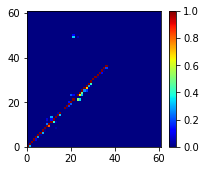

In [125]:
# check

toto = xxxx[3,35,:,:]
fig , axs =  plt.subplots(1, 1, figsize=(3,2.5))
ax = axs
c = ax.pcolor(toto,cmap='jet',vmin=0,vmax=1)
fig.colorbar(c, ax=ax)
xxxx.shape

# Declarations 

In [77]:
zones_names = np.array(S['zone names'])
print(zones_names)

['Formia' 'Minturno' 'Cellole' 'Dominzia' 'Mondragrone' 'Volturno'
 'Coppola' 'Patria' 'Torregaveta' 'IschiAMP' 'IschiaNW' 'CanaleN'
 'CanaleW' 'CanaleE' 'Bagnoli' 'Gaiola' 'Napoli-MC' 'TorrGr' 'Sarno'
 'VicoSorr' 'MassaL' 'Capri' 'CanyonDohrn' 'BoccaP' 'PuntaCamp'
 'Fontanelle' 'Positano' 'Praiano' 'Maiori' 'Cetara' 'VietriSalerno'
 'Arechi' 'Aversana' 'Sele' 'Paestum' 'Agropoli' 'S.MariaCast' 'GaeTi1'
 'GaeTi2' 'GaeTi3' 'GaeTi4' 'GaeTi5' 'GaeTi6' 'GaeTi7' 'GaeTi8' 'BoccaG1'
 'BoccaG2' 'BoccaG3' 'BoccaG4' 'BoccaG5' 'SalerTirr1' 'SalerTirr2'
 'SalerTirr3' 'SalerTirr4' 'SalerTirr5' 'SalerTirr6' 'SalerTirr7'
 'SalerTirr8' 'SalerTirr9' 'SalerTirr10' 'SalernTirr11']


In [78]:
imacro = np.array(S.iloc[:,1])

imacro_simple = imacro*1
imacro_simple[imacro_simple==100] = 1
imacro_simple[imacro_simple==200] = 2
imacro_simple[imacro_simple==300] = 3

imacro_simple[imacro_simple==12] = 12
imacro_simple[imacro_simple==23] = 23

imacro_simple[imacro_simple==10] = 1
imacro_simple[imacro_simple==20] = 2
imacro_simple[imacro_simple==30] = 3

imacro_simple

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 12, 12, 12,  2,  2,  2,
        2,  2,  2,  2,  2,  2, 23,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3])

In [79]:
imacro = np.array(S.iloc[:,1])
nmacro = imacro*np.nan
print(len(imacro),'zones \n')

unique_macro_list = np.unique(imacro)
Imacro = unique_macro_list
Nmacro = Imacro*np.nan
for p in range(0,len(Imacro)) :
    f = np.where(imacro == Imacro[p])[0]
    Nmacro[p] = len(f)
    print('IDs:', Imacro[p],'    N:',len(f))  

61 zones 

IDs: 1     N: 10
IDs: 2     N: 8
IDs: 3     N: 12
IDs: 10     N: 8
IDs: 12     N: 3
IDs: 20     N: 5
IDs: 23     N: 1
IDs: 30     N: 11
IDs: 100     N: 1
IDs: 200     N: 1
IDs: 300     N: 1


In [80]:
print(imacro)
print(Imacro)
print(Nmacro)
np.sum(Nmacro)

[  1   1   1   1   1 100   1   1   1   1   1  12  12  12   2   2   2   2
 200   2   2   2   2  23   3   3   3   3   3   3   3   3   3 300   3   3
   3  10  10  10  10  10  10  10  10  20  20  20  20  20  30  30  30  30
  30  30  30  30  30  30  30]
[  1   2   3  10  12  20  23  30 100 200 300]
[10.  8. 12.  8.  3.  5.  1. 11.  1.  1.  1.]


61.0

# COUNT

In [126]:
# sum of periods of [2013-2017] (00=full year, 01=DJF, 02=MAM, 03=JJA, 04=SON)
#
CC_00, CC_01, CC_02, CC_03, CC_04, CC_00_metric2, CC_01_metric2, CC_02_metric2, CC_03_metric2, CC_04_metric2, lc01,lc02,lc03,lc04 = sum_matrice_conn(xxxx,mmy)

# specific period: args= year, doy1, doy2
#
PP, PP_metric2 = sum_matrice_conn_PERIO(xxxx,yea,doy,2015,1,100)

# sub-sums of the matrix elements by groups
#
xxxx_macro = sum_matrice_conn_MACRO(xxxx,imacro)
GG_00, GG_01, GG_02, GG_03, GG_04, GG_00_metric2, GG_01_metric2, GG_02_metric2, GG_03_metric2, GG_04_metric2, lg01,lg02,lg03,lg04 = sum_matrice_conn(xxxx_macro,mmy)

print('Counted')

Counted


In [127]:
N = 254748
NZ = N / len(zones_names)
NZ_00 = NZ * 71 * 5
NZ_01 = NZ * lc01 * 5
NZ_02 = NZ * lc02 * 5
NZ_03 = NZ * lc03 * 5
NZ_04 = NZ * lc04 * 5
print(np.round([NZ_00,NZ_01,NZ_02,NZ_03,NZ_04]))

print(lc01,lc02,lc03,lc04)
print(lg01,lg02,lg03,lg04)

[1482550.  334096.  396739.  375858.  375858.]
16 19 18 18
16 19 18 18


# PLOTS

In [128]:
XX, YY = np.meshgrid(lon + np.mean(np.diff(lon))/2,lat + np.mean(np.diff(lat))/2)


durata = int(fn.split('.')[0].split('_')[2])

for SEAS in range(0,4+1):   
    comd = 'MM = CC_0'+str(SEAS)+'*NZ_0'+str(SEAS)
    print(SEAS,'   ',comd)
    exec(comd)
    if SEAS == 0:    seaso_str = 'YYY [2013-2017]'
    elif SEAS == 1:  seaso_str = 'DJF [2013-2017]'
    elif SEAS == 2:  seaso_str = 'MAM [2013-2017]'
    elif SEAS == 3:  seaso_str = 'JJA [2013-2017]'
    elif SEAS == 4:  seaso_str = 'SON [2013-2017]'
                    
    
    title_str_a = seaso_str
    title_str_b = '$N_{count}^{}$ '+str(durata)+ 'days after '
    title_str_c = fn
    
    from matplotlib import colors
    cmap = plt.cm.jet
    delt = .1
    norm = colors.BoundaryNorm(np.arange(2, 6 + delt, delt), cmap.N)
    
    for a in range(0,2+1):
        fig, axs = plt.subplots(1, 1,figsize=(4,4.5))
        ax = axs
        ax.set_xlim([13.50,15.10])
        ax.set_ylim([40.15,41.30])
        ax.set_xlabel('Longitude $(decimal \degree)$', fontsize=10)
        ax.set_ylabel('Latitude $(decimal \degree)$', fontsize=10)
        ax.plot(TCOAST_lon,TCOAST_lat,'k-',lw=1)
        #for i in range(0,len(DOM_X)):
        for i in range(0,36+1):
            lonC = S['lon C'][i]
            latC = S['lat C'][i]

            if a == 0:   A = 5  ; title_case = '\n'+'\n'+'Emission: Volturno'; 
            elif a == 1: A = 18 ; title_case = '\n'+'\n'+'Emission: Sarno'; 
            elif a == 2: A = 33 ; title_case = '\n'+'\n'+'Emission: Sele'; 
            
            ax.plot(lonC,latC,'o',color='k',markersize=11,markerfacecolor='k',alpha=.08, markeredgecolor='k',lw=1)
            sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
        ax.plot(13.9175+dlon/4,40.9584+dlat,'*',color='w',markersize=16,markeredgecolor='k',lw=4)
        ax.plot(14.4013+1.25*dlon,40.685+dlat/1.5,'*',color='w',markersize=16,markeredgecolor='k',lw=4)
        ax.plot(14.8729+1.25*dlon,40.4527+dlat/1.5,'*',color='w',markersize=16,markeredgecolor='k',lw=4)
        
        ax.text(13.9175+dlon/4+0.08,40.9584+dlat,'Volturno',fontsize=8)
        ax.text(14.4013+1.25*dlon+0.08,40.685+dlat/1.5,'Sarno',fontsize=8)
        ax.text(14.8729+1.25*dlon,40.4527+dlat/1.5+0.04,'Sele',fontsize=8)
        ax.text(14.2,40.88,'Napoli',fontsize=8)
        
        
        ax.set_title(title_str_a+'\n'+title_str_b+'\n'+title_case,loc='left',fontsize=16) 
        
        cbar = fig.colorbar(sc)
        cbar.ax.set_yticks(np.arange(2,7,1))  
        cbar.ax.set_yticklabels(['$10^2$','$10^3$','$10^4$','$10^5$','$10^6$'])  


        fig.tight_layout(pad=1)
        fig_filename = 'EMITTED_FROM_'+str(a)+'_count_after_'+str(durata)+'d_'+seaso_str[0:3]
        

        fig.savefig(dir_out+'plots/'+str(durata)+'/' + fig_filename + '.pdf')
        fig.savefig(dir_out+'plots/'+str(durata)+'/' + fig_filename + '.png', dpi=600)
        
        plt.close(fig)
print('coucou')

0     MM = CC_00*NZ_00


<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


1     MM = CC_01*NZ_01


<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


2     MM = CC_02*NZ_02


<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


3     MM = CC_03*NZ_03


<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


4     MM = CC_04*NZ_04


<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
<ipython-input-128-e92c6407e4fe>:44: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[i,A]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


coucou


# PLOTS

In [31]:
print(zones_names[9])
print(zones_names[15])
print(zones_names[16])
print(zones_names[22])
print(zones_names[24])

IschiAMP
Gaiola
Napoli-MC
CanyonDohrn
PuntaCamp


In [ ]:
T = []
for i in range(0,len(DOM_X)):
    per = np.round(100*len(np.where(MM[:,i]==0)[0])/61,0)
    if per == 100.0 :
        #print(i,per)
        T.append(i)
T = np.array(T)
zones_names[T]
T

In [129]:
XX, YY = np.meshgrid(lon + np.mean(np.diff(lon))/2,lat + np.mean(np.diff(lat))/2)

durata = int(fn.split('.')[0].split('_')[2])

for SEAS in range(0,4+1):   
    comd = 'MM = CC_0'+str(SEAS)+'*NZ_0'+str(SEAS)
    print(SEAS,'   ',comd)
    exec(comd)
    if SEAS == 0:    seaso_str = 'YYY [2013-2017]'
    elif SEAS == 1:  seaso_str = 'DJF [2013-2017]'
    elif SEAS == 2:  seaso_str = 'MAM [2013-2017]'
    elif SEAS == 3:  seaso_str = 'JJA [2013-2017]'
    elif SEAS == 4:  seaso_str = 'SON [2013-2017]'
                    
    title_str_a = seaso_str
    title_str_b = '$N_{count}^{}$ '+str(durata)+ 'days before'
    title_str_c = fn
    
    from matplotlib import colors
    cmap = plt.cm.jet
    delt = .1
    norm = colors.BoundaryNorm(np.arange(2, 6 + delt, delt), cmap.N)
    
    fig, axs = plt.subplots(1, 5,figsize=(21,4.5))
    for a in range(0,4+1):
        ax = axs[a]
        ax.set_xlim([13.50,15.10])
        ax.set_ylim([40.15,41.30])
        ax.set_xlabel('Longitude $(decimal \degree)$', fontsize=10)
        ax.set_ylabel('Latitude $(decimal \degree)$', fontsize=10)
        ax.plot(TCOAST_lon,TCOAST_lat,'k-',lw=1)
        #for i in range(0,len(DOM_X)):
        for i in range(0,36+1):
            lonC = S['lon C'][i]
            latC = S['lat C'][i]
      
            if a == 0:   A = 9 ; title_case = '\n'+'\n'+'Origin of particles'+'\n'+'Destination: '+zones_names[A]; 
            elif a == 1: A = 15; title_case = '\n'+'\n'+'Origin of particles'+'\n'+'Destination: '+zones_names[A]; 
            elif a == 2: A = 16; title_case = '\n'+'\n'+'Origin of particles'+'\n'+'Destination: '+zones_names[A]; 
            elif a == 3: A = 22; title_case = '\n'+'\n'+'Origin of particles'+'\n'+'Destination: '+zones_names[A]; 
            elif a == 4: A = 24; title_case = '\n'+'\n'+'Origin of particles'+'\n'+'Destination: '+zones_names[A]; 
           
            if i != A:
                ax.plot(lonC,latC,'o',color='k',markersize=11,markerfacecolor='k',alpha=.08, markeredgecolor='k',lw=1)
                sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[A,i]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)
            #ax.plot(S['lon C'][A],S['lat C'][A],'+',color='k',markersize=16,markeredgewidth=4)
            ax.plot(S['lon C'][A],S['lat C'][A],'o',color='w',markersize=11,markerfacecolor='w',alpha=.8, markeredgecolor='k',lw=1)
            
        ax.plot(13.9175+dlon/4,40.9584+dlat,'*',color='w',markersize=16,markeredgecolor='k',lw=4)
        ax.plot(14.4013+1.25*dlon,40.685+dlat/1.5,'*',color='w',markersize=16,markeredgecolor='k',lw=4)
        ax.plot(14.8729+1.25*dlon,40.4527+dlat/1.5,'*',color='w',markersize=16,markeredgecolor='k',lw=4)
        
        ax.text(13.9175+dlon/4+0.08,40.9584+dlat,'Volturno',fontsize=8)
        ax.text(14.4013+1.25*dlon+0.08,40.685+dlat/1.5,'Sarno',fontsize=8)
        ax.text(14.8729+1.25*dlon,40.4527+dlat/1.5+0.04,'Sele',fontsize=8)
        ax.text(14.2,40.88,'Napoli',fontsize=8)
        
        if a == 0:
            ax.set_title(title_str_a+title_case,loc='left',fontsize=16)
        if a == 1:
            ax.set_title(title_str_b+title_case,loc='left',fontsize=16)
        if a == 2:
            ax.set_title(title_str_c+title_case,loc='left',fontsize=16) 
        if a == 3:
            ax.set_title(''+title_case,loc='left',fontsize=16) 
        if a == 4:
            ax.set_title(''+title_case,loc='left',fontsize=16) 

        cbar = fig.colorbar(sc)
        cbar.ax.set_yticks(np.arange(2,7,1))  
        cbar.ax.set_yticklabels(['$10^2$','$10^3$','$10^4$','$10^5$','$10^6$'])  


    fig.tight_layout(pad=1)
    fig_filename = 'ARRIVED_AT___count_after_'+str(durata)+'d_'+seaso_str[0:3]
    fig.savefig(dir_out+'plots/'+str(durata)+'/' + fig_filename + '.pdf')
    fig.savefig(dir_out+'plots/'+str(durata)+'/' + fig_filename + '.png', dpi=600)
    
    plt.close(fig)
    
print('COUCOU')

0     MM = CC_00*NZ_00


<ipython-input-129-2261238994cd>:45: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[A,i]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


1     MM = CC_01*NZ_01


<ipython-input-129-2261238994cd>:45: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[A,i]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


2     MM = CC_02*NZ_02


<ipython-input-129-2261238994cd>:45: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[A,i]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


3     MM = CC_03*NZ_03


<ipython-input-129-2261238994cd>:45: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[A,i]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


4     MM = CC_04*NZ_04


<ipython-input-129-2261238994cd>:45: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(lonC,latC, s=120, c=np.log10(MM[A,i]), norm=norm, cmap=cmap,marker='o',edgecolors='k',lw=1)


COUCOU
